In [27]:
import keras.layers
from tensorflow import keras
import tensorflow as tf

In [19]:
# Path to images
path_to_images = "training-data/dataset1/known_images"

In [30]:
train_dataset, val_dataset = keras.utils.image_dataset_from_directory(
    path_to_images,
    class_names=["normal", "sick"],
    batch_size = 32,
    image_size=(395, 488),
    validation_split=0.2,
    subset="both",
    seed=200
)

Found 715 files belonging to 2 classes.
Using 572 files for training.
Using 143 files for validation.


In [62]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.2)
    ]
)

In [64]:
# Create input shape
inputs = keras.Input(shape=(395, 488, 3))

# Data augmentation
x = data_augmentation(inputs)

# Normalize the features from (0 -255) to (0 -1)
x = keras.layers.Rescaling(1./255)(x)

# Create a convolutional layer with max pooling
x = keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)

x = keras.layers.Flatten()(x)

# x = keras.layers.Dense(64, activation="relu")(x)

# Create the model output
outputs = keras.layers.Dense(1, activation="sigmoid")(x)


In [65]:
model = keras.Model(inputs=inputs, outputs=outputs, name="Chest_Opacities_Detection")

In [66]:
model.summary()

Model: "Chest_Opacities_Detection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 395, 488, 3)]     0         
                                                                 
 conv2d_48 (Conv2D)          (None, 393, 486, 256)     7168      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 196, 243, 256)    0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 12192768)          0         
                                                                 
 dense_11 (Dense)            (None, 1)                 12192769  
                                                                 
Total params: 12,199,937
Trainable params: 12,199,937
Non-trainable params: 0
_____________________________

In [57]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=['accuracy']
)

In [58]:
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset
)

Epoch 1/5
18/18 [==============================] - 349s 19s/step - loss: 5817.1396 - accuracy: 0.6416 - val_loss: 214.7421 - val_accuracy: 0.7552
Epoch 2/5
18/18 [==============================] - 287s 16s/step - loss: 270.1956 - accuracy: 0.8671 - val_loss: 62.7382 - val_accuracy: 0.8881
Epoch 3/5
18/18 [==============================] - 257s 14s/step - loss: 99.7524 - accuracy: 0.8864 - val_loss: 186.5370 - val_accuracy: 0.8112
Epoch 4/5
18/18 [==============================] - 255s 14s/step - loss: 50.6511 - accuracy: 0.9248 - val_loss: 2728.7620 - val_accuracy: 0.4336
Epoch 5/5
18/18 [==============================] - 301s 17s/step - loss: 433.8308 - accuracy: 0.7308 - val_loss: 10.6801 - val_accuracy: 0.9650


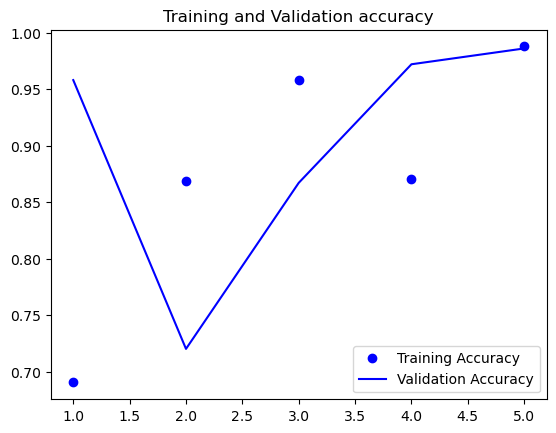

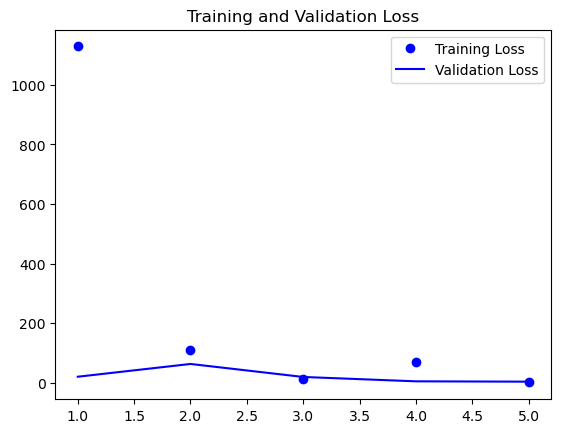

<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()
plt.show()

In [22]:
inputs = keras.Input(shape=(395, 488, 3))

# Normalize the dataset
x = layers.Rescaling(1./255)(inputs)

# First convnet cluster
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Second convnet cluster
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Thrid convnet cluster
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Fourth convent cluster
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Fifth convent cluster
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Sixth convnet cluster
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten the 3D convnet ouput to 1D output
x = layers.Flatten()(x)

# Output Layer
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 395, 488, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 395, 488, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 393, 486, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 196, 243, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 194, 241, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 97, 120, 64)      0         
 g2D)                                                      

In [24]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [25]:
calllbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/chest_opacities_detection_model_v1.keras",
        save_best_only = True,
        monitor = "loss"
    )
]

In [26]:
history = model.fit(
    dataset,
    epochs=30,
    callbacks=calllbacks
)

Epoch 1/30
23/23 [==============================] - 142s 6s/step - loss: 0.8771 - accuracy: 0.5385
Epoch 2/30
23/23 [==============================] - 140s 6s/step - loss: 0.6531 - accuracy: 0.6587
Epoch 3/30
23/23 [==============================] - 140s 6s/step - loss: 0.4123 - accuracy: 0.8168
Epoch 4/30
23/23 [==============================] - 154s 7s/step - loss: 0.2771 - accuracy: 0.8965
Epoch 5/30
23/23 [==============================] - 155s 7s/step - loss: 0.2227 - accuracy: 0.9063
Epoch 6/30
23/23 [==============================] - 135s 6s/step - loss: 0.2722 - accuracy: 0.9021
Epoch 7/30
23/23 [==============================] - 134s 6s/step - loss: 0.1266 - accuracy: 0.9594
Epoch 8/30
23/23 [==============================] - 136s 6s/step - loss: 0.1425 - accuracy: 0.9552
Epoch 9/30
23/23 [==============================] - 137s 6s/step - loss: 0.0881 - accuracy: 0.9636
Epoch 10/30
23/23 [==============================] - 140s 6s/step - loss: 0.0723 - accuracy: 0.9762
Epoch 11/

In [5]:
for data, labels in dataset:
    print(data.shape)  # (64, 200, 200, 3)
    print(data.dtype)  # float32
    print(labels.shape)  # (64,)
    print(labels.dtype)  # int32

2023-05-03 21:25:14.295696: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 395, 488, 3)
<dtype: 'float32'>
(32

In [15]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [16]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

In [17]:
model = keras.Sequential()

# Add layers
model.add(keras.layers.Rescaling(1.0/255))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(395, 488, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.25))

# Flatten the convolution layer output
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [18]:
# Compile the model
model.compile(optimizer = "adam",loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Make predictions